## Top Golf Courses in the United States Natural Language Process (NLP) Anlysis Overview

1. **Compare TF-IDF vs Doc2Vec for feature extraction** 
    - Vectorize the reviews using both TF-IDF and Doc2Vec (gensim library).
    - TF-IDF represents documents as a weighted vector of important words. Doc2Vec learns semantic vector representations of documents.
    - Compare the two approaches qualitatively and quantitatively (e.g. in downstream clustering/classification tasks) to see which captures more meaningful information from the reviews.

2. **Compare K-means clustering vs LDA for topic modeling**
    - Apply K-means clustering and LDA on the vectorized reviews to discover latent topics/themes discussed 
    - K-means aims to partition the reviews into K clusters based on feature similarity. LDA is a probabilistic model that assigns topic distributions to documents.
    - Evaluate the coherence and interpretability of the topics/clusters found by each method. Use metrics like silhouette score, perplexity, human judgment.

## Pre-phase: Importing Necessary Packages and Setting Up the Virtual Environment

In [1]:

"""
PRE-PHASE: SET UP THE ENVIRONMENT

Set up the environment with the necessary libraries, packages, and display configurations

Note: this code is written in Python 3.9, as this version of Python is compatable with the GenSim library
"""
# Enable multiple outputs in a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Import the necessary libraries and packages
# Regular expressions, string manipulation, and file system operations
import re, string, os
# Data manipulation and analysis
import pandas as pd
# Scientific computing
import numpy as np
from numpy import triu
import scipy
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Natural language processing
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import spacy
# Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import silhouette_score
# Gensim for topic modeling
from gensim.models import Word2Vec, LdaModel, TfidfModel
from gensim import corpora
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Display configurations
plt.style.use('ggplot')
sns.set_style('whitegrid')
# Set the random seed for reproducibility
np.random.seed(42)

# Download the English language model for spaCy
# !python -m spacy download en_core_web_sm


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/stefanjenss/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Phase 1: Import the Corpus of Golf Course Reviews for the Top 30 Courses in the United States

In [2]:
"""
PHASE 0: IMPORT THE GOLF COURSE REVIEW CORPUS AND CONVERSION TO CSV FILE AND DATAFRAME
    1. Firstly, since I created the golf course review corpus using Excel, I will need to convert the Excel file to a CSV file. 
       I will use the pandas library to do this.
    2. Secondly, I will use the pandas library to read the CSV file and create a DataFrame.
"""

# Convert the Excel file to a CSV file
# Read the Excel file
FILE = 'golf_course_review_corpus.xlsx'
golf_course_review = pd.read_excel(FILE)

# Save the DataFrame to a CSV file
golf_course_review.to_csv('golf_course_review_corpus.csv', index=False)

# Read the CSV file and create a DataFrame
golf_course_review = pd.read_csv('golf_course_review_corpus.csv')
golf_course_review.head()

'\nPHASE 0: IMPORT THE GOLF COURSE REVIEW CORPUS AND CONVERSION TO CSV FILE AND DATAFRAME\n    1. Firstly, since I created the golf course review corpus using Excel, I will need to convert the Excel file to a CSV file. \n       I will use the pandas library to do this.\n    2. Secondly, I will use the pandas library to read the CSV file and create a DataFrame.\n'

,review_id,course_name,location,architect,year_built,review_title,review_author,file_name,review_text
0,1,Pine Valley,"Pine Valley, NJ",George Crump / Harry S. Colt,1918,PINE VALLEY GOLF CLUB - 19 POINTS,David Jones,rev1_pine_valley_1,There’s not much point trying to do a hole-by-...
1,2,Pine Valley,"Pine Valley, NJ",George Crump / Harry S. Colt,1918,"Pine Valley Golf Club (Clementon, New Jersey)",Bill Satterfield,rev2_pine_valley_2,What to Expect: Pine Valley is the finest gol...
2,3,Cypress Point,"Pebble Beach, CA",Alister MacKenzie,1928,Cypress Point,top100golfcourses,rev3_cypress_point_1,Every true golfer would love to play Cypress P...
3,4,Cypress Point,"Pebble Beach, CA",Alister MacKenzie,1928,"Cypress Point Golf Club (Pebble Beach, Califor...",Bill Satterfield,rev4_cypress_point_2,What to Expect: I don't even feel worthy to w...
4,5,Shinnecock Hills,"Southampton, NY",William Flynn,1931,Review: Shinnecock Hills Golf Club,Andrew Harvey,rev5_shinnecock_1,"There’s not many courses as acclaimed, sought ..."


'\nPHASE 1: Exploratory Data Analysis (EDA)\n\nIn this phase, I will perform an exploratory data analysis (EDA) on the golf course review corpus to gain a better understanding of\nthe data. I will perform the following tasks:\n    1. Calculate the summary statistics for the year_built column to better understand the distribution of when these top golf courses\n       were built.\n    2. Create a histogram and boxplot of the year_built column to visualize the distribution of when these top golf courses were built.\n    3. Create a frequency distribution for the architect to understand if there are certain architects that designed more of these\n       top golf courses.\n    4. Create a frequency distribution for the location column to understand the distribution of these top golf courses across different\n       states. \n         - Note: The location column contains both the city and state information, so I will need to extract the state information\n    5. Create a frquency distribtio

count      60.000000
mean     1928.266667
std        26.483040
min      1895.000000
25%      1917.000000
50%      1924.500000
75%      1932.000000
max      2003.000000
Name: year_built, dtype: float64

<Figure size 1200x400 with 0 Axes>

/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year_built', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Year Built for the Top 30 Golf Courses in the United States')

Text(0.5, 0, 'Year Built')

Text(0, 0.5, 'Frequency')

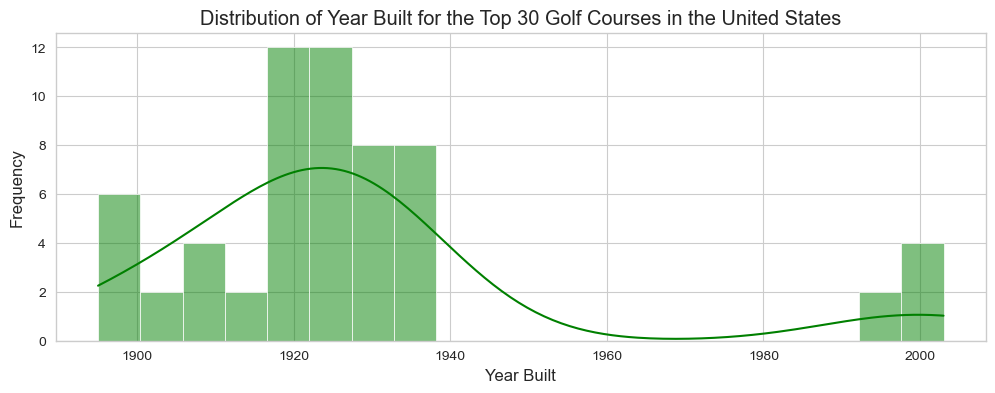

<Figure size 1200x300 with 0 Axes>

/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='year_built'>

Text(0.5, 1.0, 'Box-and-Whisker Plot of Year Built for the Top 30 Golf Courses in the United States')

Text(0.5, 0, 'Year Built')

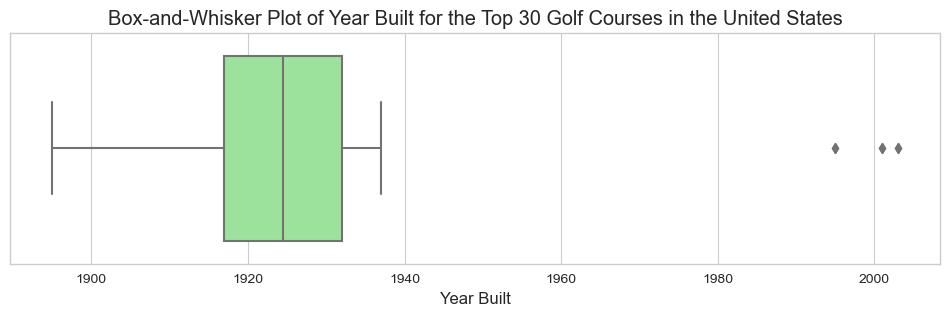

<Figure size 1200x600 with 0 Axes>

/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='architect'>

Text(0.5, 1.0, 'Frequency Distribution of Architects for the Top 30 Golf Courses in the U.S.')

Text(0.5, 0, 'Frequency')

Text(0, 0.5, 'Architects')

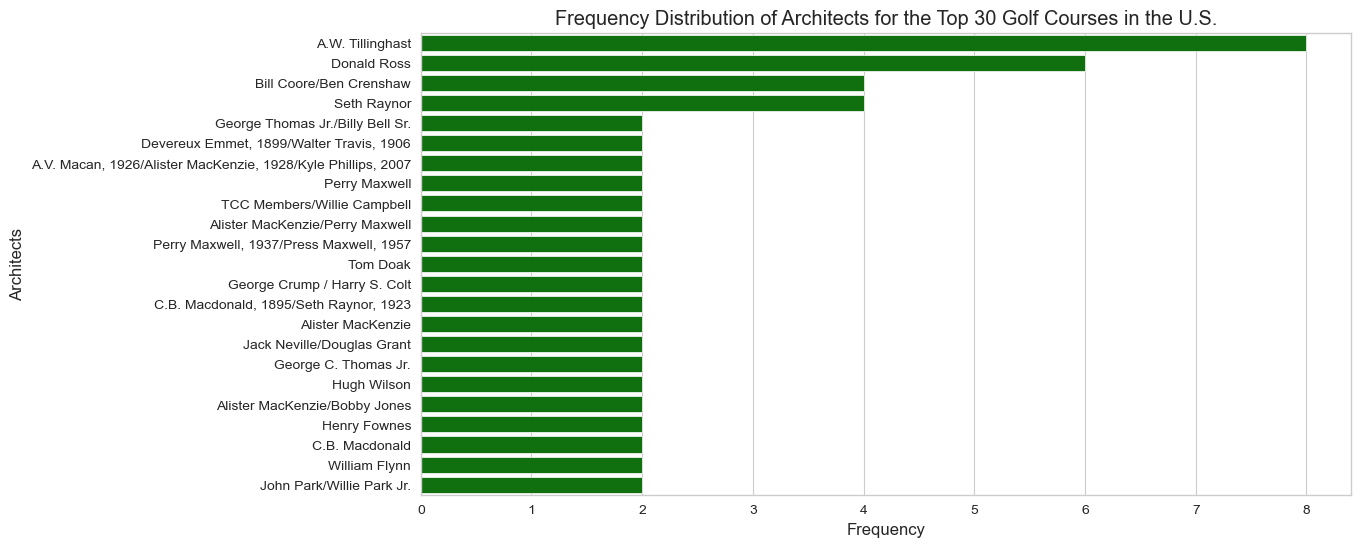

<Figure size 1200x400 with 0 Axes>

/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='state'>

Text(0.5, 1.0, 'Frequency Distribution of Top 30 Golf Courses by state in the U.S.')

Text(0.5, 0, 'Frequency')

Text(0, 0.5, 'State')

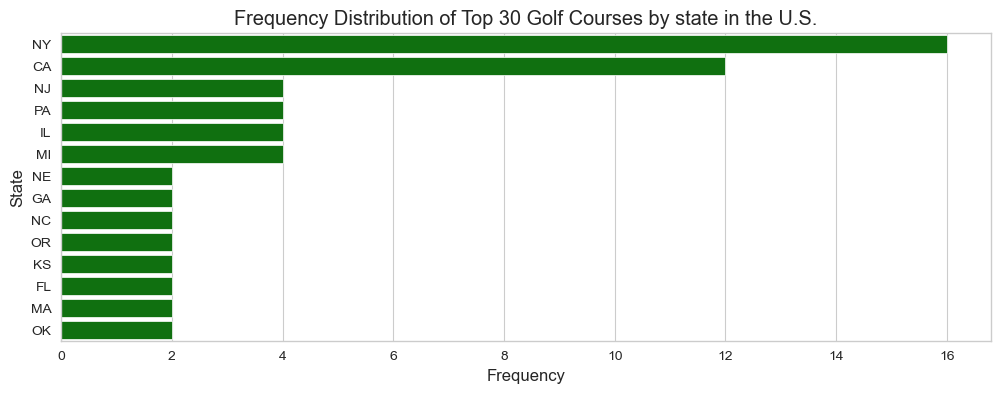

<Figure size 1200x400 with 0 Axes>

/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='review_author'>

Text(0.5, 1.0, 'Frequency Distribution of Review Authors for the Top 30 Golf Courses in the U.S.')

Text(0.5, 0, 'Frequency')

Text(0, 0.5, 'Review Authors')

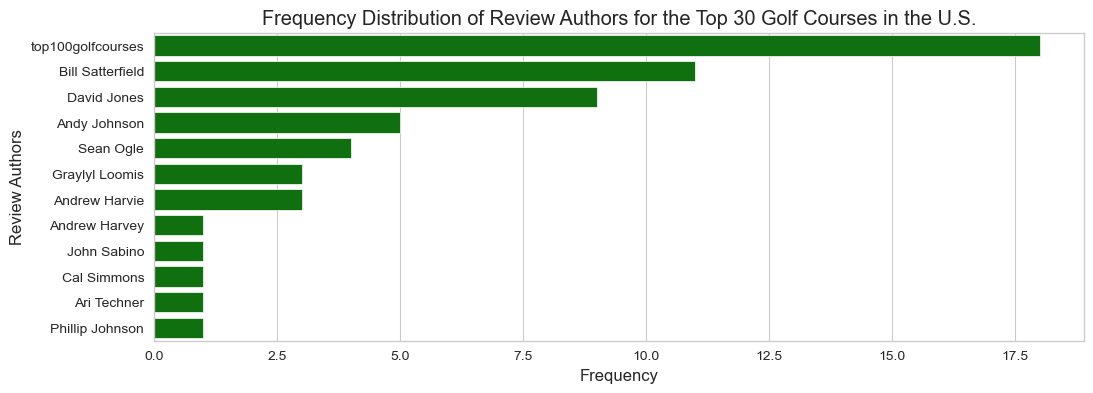

In [21]:
"""
PHASE 1: Exploratory Data Analysis (EDA)

In this phase, I will perform an exploratory data analysis (EDA) on the golf course review corpus to gain a better understanding of
the data. I will perform the following tasks:
    1. Calculate the summary statistics for the year_built column to better understand the distribution of when these top golf courses
       were built.
    2. Create a histogram and boxplot of the year_built column to visualize the distribution of when these top golf courses were built.
    3. Create a frequency distribution for the architect to understand if there are certain architects that designed more of these
       top golf courses.
    4. Create a frequency distribution for the location column to understand the distribution of these top golf courses across different
       states. 
         - Note: The location column contains both the city and state information, so I will need to extract the state information
    5. Create a frquency distribtion of the review_authors column to understand the distribution of reviews by authors.            
"""

### 1. Calculate the summary statistics for the year_built column ###
year_built_summary = golf_course_review['year_built'].describe()
year_built_summary

### 2.a Create a histogram of the year_built column ###
plt.figure(figsize=(12, 4))
sns.histplot(data=golf_course_review, x='year_built', bins=20, kde=True, color='green')
plt.title('Distribution of Year Built for the Top 30 Golf Courses in the United States')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.show()

### 2.b Create a boxplot plot of the year_built column ###
plt.figure(figsize=(12, 3))
sns.boxplot(data=golf_course_review, x='year_built', color='lightgreen')
plt.title('Box-and-Whisker Plot of Year Built for the Top 30 Golf Courses in the United States')
plt.xlabel('Year Built')
plt.show()

### 3. Create a frequency distribution for the architect column ###
# Calculate the frequency of architects
architect_freq = golf_course_review['architect'].value_counts()
# Visualize the frequency distribution of architects
plt.figure(figsize=(12, 6))
sns.barplot(x=architect_freq.values, y=architect_freq.index, color='green')
plt.title('Frequency Distribution of Architects for the Top 30 Golf Courses in the U.S.')
plt.xlabel('Frequency')
plt.ylabel('Architects')
plt.show()

### 4. Create a frequency distribution for the location column ###
# Extract the state information from the location column
golf_course_review['state'] = golf_course_review['location'].apply(lambda x: x.split(',')[-1].strip())
# Calculate the frequency of golf courses by state
state_freq = golf_course_review['state'].value_counts()
# Visualize the frequency distribution of golf courses by state
plt.figure(figsize=(12, 4))
sns.barplot(x=state_freq.values, y=state_freq.index, color='green')
plt.title('Frequency Distribution of Top 30 Golf Courses by state in the U.S.')
plt.xlabel('Frequency')
plt.ylabel('State')
plt.show()

### 5. Create a frequency distribution of the review_authors column ###
# Calculate the frequency of review authors
author_freq = golf_course_review['review_author'].value_counts()
# Visualize the frequency distribution of review authors
plt.figure(figsize=(12, 4))
sns.barplot(x=author_freq.values, y=author_freq.index, color='green')
plt.title('Frequency Distribution of Review Authors for the Top 30 Golf Courses in the U.S.')
plt.xlabel('Frequency')
plt.ylabel('Review Authors')
plt.show()

In [4]:
"""
PHASE 2: DATA PREPROCESSING

The next step is to preprocess the text data. I will perform the following steps to clean the text data:
    1. Tokenization: Split the text into words
    2. Punctuation removal: Remove punctuation from the text
    3. Non-alphabetic token removal: Remove tokens that are not alphabetic
    4. Short token removal: Remove tokens that are less than 3 characters
    5. Lowercasing: Convert the text to lowercase
    6. Stopword removal: Remove stopwords from the text
        - For the stopword removal step, I will use the NLTK corpus, which provides a list of stopwords for the English language.
    7. Lemmatization: Reduce words to their base or root form
        - For the lemmatization step, I will use the spaCy library, which provides a fast and accurate lemmatization tool.
    8. Domain-specific stopword removal: Remove domain-specific stopwords that are not captured by the general stopwords, but
       that are very common in the golf course review corpus.
            The domain-specific stopwords identified are:
            - course
            - play
            - hole
            - green
            - par
            - tee
            - yard
            - golf
    9. Apply the preprocessing function to the 'review_text' column to clean the text data
"""



# Define the function to preprocess the text data
def preprocess_test(text):
    tokens = word_tokenize(text)    # 1. Tokenization
    tokens = [re.sub(r'[^\w\s]', '', word) for word in tokens]    # 2. Punctuation removal
    tokens = [word for word in tokens if word.isalpha()]    # 3. Non-alphabetic token removal
    tokens = [word for word in tokens if len(word) > 2]    # 4. Short token removal
    tokens = [word.lower() for word in tokens]    # 5. Lowercasing
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]    # 6. Stopword removal
    # 7. Lemmatization using the spaCy libary
        # Load the English Language model
    nlp = spacy.load('en_core_web_sm')
        # Apply lemmatization to each token
    tokens = [token.lemma_ for token in nlp(' '.join(tokens))]
    # 8. Domain-specific stopword removal
    domain_specific_stopwords = ['course', 'play', 'hole', 'green', 'par', 'tee', 'yard', 'golf', 'one']
    tokens = [word for word in tokens if word not in domain_specific_stopwords]
    # Return the preprocessed text as a single string
    return ' '.join(tokens)

# 9. Apply the preprocessing function to the 'review_text' column
golf_course_review['cleaned_review_text'] = golf_course_review['review_text'].apply(preprocess_test)

# Display the preprocessed text data
golf_course_review[['review_id', 'file_name', 'review_text', 'cleaned_review_text']].head()
    

"\nPHASE 2: DATA PREPROCESSING\n\nThe next step is to preprocess the text data. I will perform the following steps to clean the text data:\n    1. Tokenization: Split the text into words\n    2. Punctuation removal: Remove punctuation from the text\n    3. Non-alphabetic token removal: Remove tokens that are not alphabetic\n    4. Short token removal: Remove tokens that are less than 3 characters\n    5. Lowercasing: Convert the text to lowercase\n    6. Stopword removal: Remove stopwords from the text\n        - For the stopword removal step, I will use the NLTK corpus, which provides a list of stopwords for the English language.\n    7. Lemmatization: Reduce words to their base or root form\n        - For the lemmatization step, I will use the spaCy library, which provides a fast and accurate lemmatization tool.\n    8. Domain-specific stopword removal: Remove domain-specific stopwords that are not captured by the general stopwords, but\n       that are very common in the golf course

,review_id,file_name,review_text,cleaned_review_text
0,1,rev1_pine_valley_1,There’s not much point trying to do a hole-by-...,much point try holebyhole guide pine valley si...
1,2,rev2_pine_valley_2,What to Expect: Pine Valley is the finest gol...,expect pine valley fine planet hold royal flus...
2,3,rev3_cypress_point_1,Every true golfer would love to play Cypress P...,every true golfer would love cypress point rea...
3,4,rev4_cypress_point_2,What to Expect: I don't even feel worthy to w...,expect even feel worthy write review cypress p...
4,5,rev5_shinnecock_1,"There’s not many courses as acclaimed, sought ...",many acclaim seek document shinnecock hill clu...


In [5]:
from sklearn.metrics import silhouette_score
"""
PHASE 3: COMPARING TF-IDF AND WORD2VEC FOR TEXT REPRESENTATION AND CLUSTERING

In this phase, I will compare two popular text representation techniques, TF-IDF and Doc2Vec, for clustering the golf course reviews. 
I will perform the following steps to cluster the reviews using both techniques:
    1. TF-IDF representation: Convert the preprocessed text data into a TF-IDF matrix
    2. K-Means clustering: Cluster the reviews using K-Means clustering with the TF-IDF matrix
    3. Visualization: Visualize for TF-IDF clusters using both Multidimensional Scaling (MDS) and Principal Component Analysis (PCA) techniques 
    4. Doc2Vec representation: Train a Doc2Vec model on the preprocessed text data
    5. K-Means clustering: Cluster the reviews using K-Means clustering with the Doc2Vec model
    6. Visualization: Visualize the Doc2Vec clusters using both Multidimensional Scaling (MDS) and Principal Component Analysis (PCA) techniques 
    7. Evaluation: Evaluate the clustering results using the Silhouette score and the Davies-Bouldin score
"""

### 1. TF-IDF representation ###
# Create a TF-IDF vectorizer
ifidf_vectorizer = TfidfVectorizer(ngram_range=(1,1))   # Unigrams - meaning single words (1,1)
# Fit and transform the cleaned review text data
tfidf_matrix = ifidf_vectorizer.fit_transform(golf_course_review['cleaned_review_text'])
# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=ifidf_vectorizer.get_feature_names_out(), index=golf_course_review['review_id'])
# Display the TF-IDF matrix
tfidf_df.head()

# Explore the TF-IDF matrix values
# Calculate the average TFIDF value for each word
average_TFIDF={}
for i in tfidf_df.columns:
    average_TFIDF[i]=np.mean(tfidf_df[i])

# Display the average TFIDF values
average_TFIDF_df = pd.DataFrame(average_TFIDF, index=[0]).T 
average_TFIDF_df.columns = ['TFIDF']

# Calculate the Q1 and Q3 values for the TFIDF values
Q1 = np.percentile(average_TFIDF_df['TFIDF'], 25)
Q3 = np.percentile(average_TFIDF_df['TFIDF'], 75)
IQR = Q3 - Q1
# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers in the average TFIDF values
outliers = average_TFIDF_df[(average_TFIDF_df['TFIDF'] < lower_bound) | (average_TFIDF_df['TFIDF'] > upper_bound)]
outliers

'\nPHASE 3: COMPARING TF-IDF AND WORD2VEC FOR TEXT REPRESENTATION AND CLUSTERING\n\nIn this phase, I will compare two popular text representation techniques, TF-IDF and Doc2Vec, for clustering the golf course reviews. \nI will perform the following steps to cluster the reviews using both techniques:\n    1. TF-IDF representation: Convert the preprocessed text data into a TF-IDF matrix\n    2. K-Means clustering: Cluster the reviews using K-Means clustering with the TF-IDF matrix\n    3. Visualization: Visualize for TF-IDF clusters using both Multidimensional Scaling (MDS) and Principal Component Analysis (PCA) techniques \n    4. Doc2Vec representation: Train a Doc2Vec model on the preprocessed text data\n    5. K-Means clustering: Cluster the reviews using K-Means clustering with the Doc2Vec model\n    6. Visualization: Visualize the Doc2Vec clusters using both Multidimensional Scaling (MDS) and Principal Component Analysis (PCA) techniques \n    7. Evaluation: Evaluate the clustering

,abandon,abbreviate,ability,able,abruptly,absent,absolute,absolutely,absorb,abundance,...,yorker,young,youngscap,yucca,zach,zeal,zealand,zero,zeropenaltystroke,zone
review_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.000000,0.013921,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.072825,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.000000,0.018153,0.0,0.0,0.02262,0.021062,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,TFIDF
acre,0.006619
across,0.009691
actually,0.010873
add,0.008324
age,0.006089
...,...
wrong,0.006735
yardage,0.012382
yards,0.010849
year,0.019619


'\nPHASE 3 (CONTINUED): COMPARING TF-IDF AND DOC2VEC FOR TEXT REPRESENTATION AND CLUSTERING\n'

/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kme

[0.03577386620645457,
 0.02232168085419943,
 0.013550440465777917,
 0.015408070167434977,
 0.01713328855144603,
 0.01666454874190923,
 0.02090741540970994,
 0.04441671536333387,
 0.036956170148605125]

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Silhouette Scores for Different Values of K in K-Means Clustering with TF-IDF Representation')

Text(0.5, 0, 'Number of Clusters (K)')

Text(0, 0.5, 'Silhouette Score')

([<matplotlib.axis.XTick at 0x1662d17c0>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

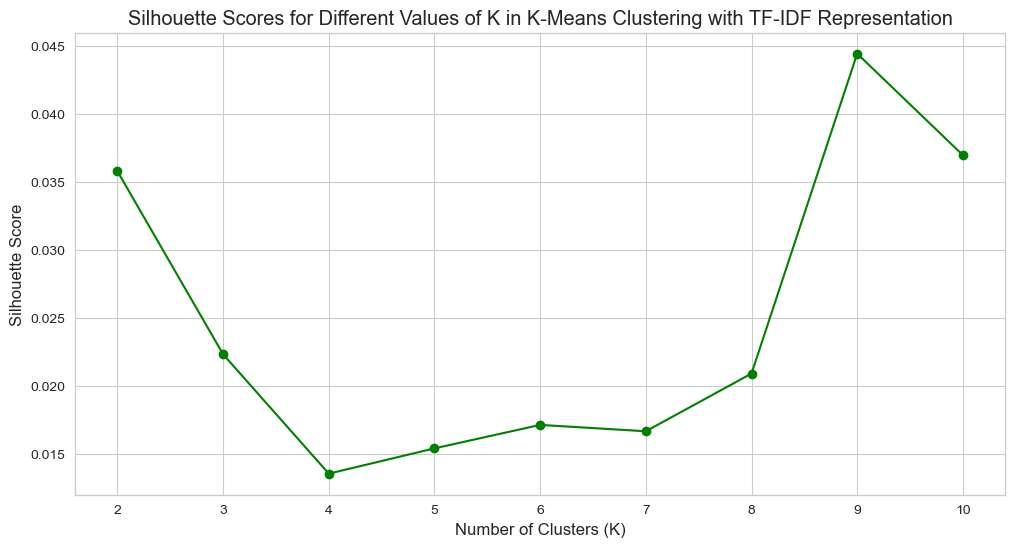

'\nInterpretation:\nThe silhouette scores indicate that the optimal number of clusters is 6, since this value of k has the \nhighest silhouette score after 2. Therefore, I will use k=6 for the K-Means clustering with the TF-IDF \nrepresentation.\n'

/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,review_id,file_name,tfidf_cluster
0,1,rev1_pine_valley_1,3
1,2,rev2_pine_valley_2,2
2,3,rev3_cypress_point_1,5
3,4,rev4_cypress_point_2,5
4,5,rev5_shinnecock_1,1


tfidf_cluster
0     2
1    19
2    16
3    11
4     3
5     2
6     2
7     3
8     2
Name: count, dtype: int64

In [23]:
"""
PHASE 3 (CONTINUED): COMPARING TF-IDF AND DOC2VEC FOR TEXT REPRESENTATION AND CLUSTERING
"""
### 2. K-Means clustering with TF-IDF representation ###
## Use Silhouette score to determine the optimal number of clusters ##
# Perform K-Means clustering for each value of k
# Initialize the list to store silhouette scores
silhouette_scores_list = []
# Define the range of k values to test
k_values = range(2, 11)
# Perform K-Means clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(tfidf_matrix)
    silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
    silhouette_scores_list.append(silhouette_avg)
# List the silhouette scores for each value of k
silhouette_scores_list
# Plot the silhouette scores for each value of k
plt.figure(figsize=(12, 6))
plt.plot(k_values, silhouette_scores_list, marker='o', color = 'green')
plt.title('Silhouette Scores for Different Values of K in K-Means Clustering with TF-IDF Representation')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

"""
Interpretation:
The silhouette scores indicate that the optimal number of clusters is 6, since this value of k has the 
highest silhouette score after 2. Therefore, I will use k=6 for the K-Means clustering with the TF-IDF 
representation.
"""

# Perform K-Means clustering with k=6
kmeans = KMeans(n_clusters=9, random_state=42)
cluster_labels = kmeans.fit_predict(tfidf_matrix)
# Add the cluster labels to the DataFrame
golf_course_review['tfidf_cluster'] = cluster_labels
# Display the cluster labels
golf_course_review[['review_id', 'file_name', 'tfidf_cluster']].head()
# Calculate the number of reviews in each cluster
cluster_counts = golf_course_review['tfidf_cluster'].value_counts().sort_index()
# Display the number of reviews in each cluster
cluster_counts

'\nPHASE 3 (CONTINUED): COMPARING TF-IDF AND WORD2VEC FOR TEXT REPRESENTATION AND CLUSTERING\n'

/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


<Figure size 1200x800 with 0 Axes>

/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_cate

<Axes: xlabel='MDS1', ylabel='MDS2'>

Text(0.5, 1.0, 'MDS Visualization of TF-IDF K-Means Clusters')

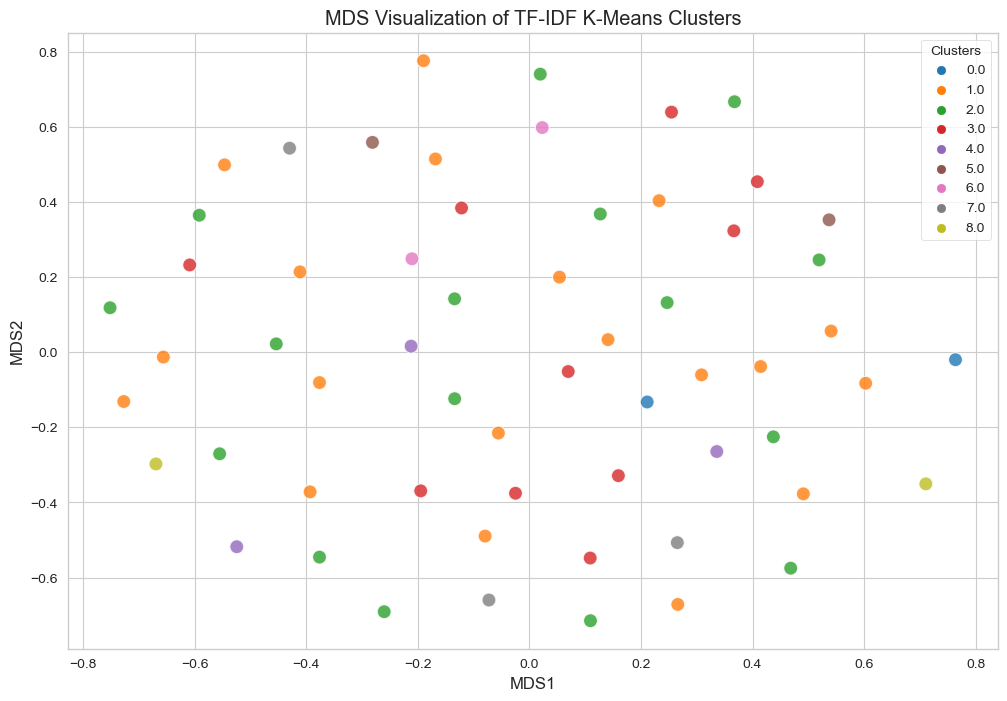

<Figure size 1200x800 with 0 Axes>

/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_cate

<Axes: xlabel='PCA1', ylabel='PCA2'>

Text(0.5, 1.0, 'PCA Visualization of TF-IDF K-Means Clusters')

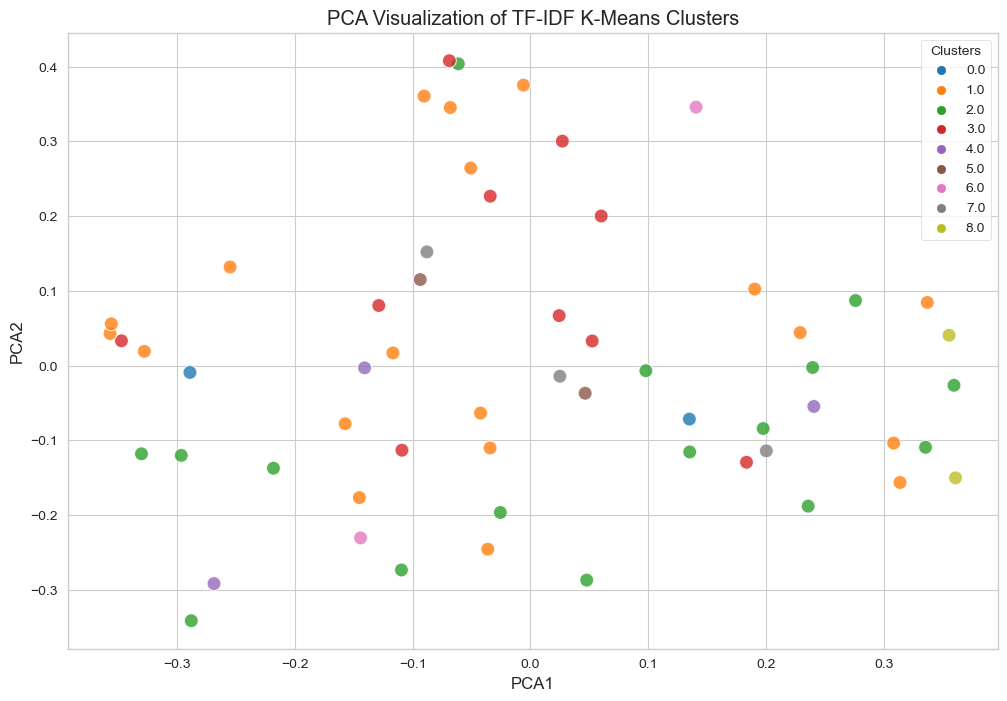

In [24]:
"""
PHASE 3 (CONTINUED): COMPARING TF-IDF AND WORD2VEC FOR TEXT REPRESENTATION AND CLUSTERING
"""
### 3. Visualization of TF-IDF clusters using Multidimensional Scaling (MDS) and Principal Component Analysis (PCA) ###
# 3.a Multidimensional Scaling (MDS) visualization
# Create a similarity matrix using cosine similarity
similarity_matrix = cosine_similarity(tfidf_matrix)
# Perform MDS to reduce the dimensionality of the similarity matrix
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_coordinates = mds.fit_transform(1 - similarity_matrix)
# Convert the MDS coordinates to a DataFrame
mds_df = pd.DataFrame(mds_coordinates, columns=['MDS1', 'MDS2'], index=golf_course_review['review_id'])
# Add the cluster labels to the MDS DataFrame
mds_df['tfidf_cluster'] = golf_course_review['tfidf_cluster']
# Plot the MDS visualization of the TF-IDF clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=mds_df, x='MDS1', y='MDS2', hue='tfidf_cluster', palette='tab10', s=100, alpha=0.8)
plt.title('MDS Visualization of TF-IDF K-Means Clusters')
plt.legend(title='Clusters', loc='upper right')
plt.show()

# 3.b Principal Component Analysis (PCA) visualization
from sklearn.decomposition import PCA
# Perform PCA to reduce the dimensionality of the TF-IDF matrix
pca = PCA(n_components=2, random_state=42)
pca_coordinates = pca.fit_transform(tfidf_matrix.toarray())
# Convert the PCA coordinates to a DataFrame
pca_df = pd.DataFrame(pca_coordinates, columns=['PCA1', 'PCA2'], index=golf_course_review['review_id'])
# Add the cluster labels to the PCA DataFrame
pca_df['tfidf_cluster'] = golf_course_review['tfidf_cluster']
# Plot the PCA visualization of the TF-IDF clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='tfidf_cluster', palette='tab10', s=100, alpha=0.8)
plt.title('PCA Visualization of TF-IDF K-Means Clusters')
plt.legend(title = 'Clusters', loc='upper right')
plt.show()

In [25]:
"""
PHASE 3 (CONTINUED): COMPARING TF-IDF AND DOC2VEC FOR TEXT REPRESENTATION AND CLUSTERING
"""
### 4. Doc2Vec representation: Train a Doc2Vec model on the preprocessed text data ###
# Create a list of TaggedDocument objects for the Doc2Vec model
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(golf_course_review['cleaned_review_text'].apply(str.split))]

# Train the Doc2Vec model
model = Doc2Vec(documents, vector_size=100, window=2, min_count=1, workers=4)

# Infer vectors for the golf course reviews - this is done by passing the cleaned review text to the model
doc2vec_df = pd.DataFrame()
for i in range(0, len(golf_course_review)):
    vector = pd.DataFrame(model.infer_vector(golf_course_review['cleaned_review_text'][i].split()).reshape(1,-1))
    doc2vec_df = pd.concat([doc2vec_df, vector], axis=0)

# Reset the index of the Doc2Vec DataFrame
doc2vec_df = doc2vec_df.reset_index()

# Add the file name to the Doc2Vec DataFrame
doc_titles = {'title': golf_course_review['file_name']}
t = pd.DataFrame(doc_titles)

# Concatenate the file name to the Doc2Vec DataFrame
doc2vec_df = pd.concat([doc2vec_df, t], axis = 1)

# Drop the 'index' column from the Doc2Vec DataFrame
doc2vec_df = doc2vec_df.drop(columns = ['index'], axis = 1)

# Display the Doc2Vec DataFrame
doc2vec_df.head()

'\nPHASE 3 (CONTINUED): COMPARING TF-IDF AND DOC2VEC FOR TEXT REPRESENTATION AND CLUSTERING\n'

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,title
0,-0.942117,-1.845751,-1.367575,-0.171104,0.065887,-0.727743,-1.743949,0.389606,-1.537076,0.709429,...,2.015946,-0.668183,-1.558454,-0.296647,1.666719,0.107824,-0.464563,1.890471,0.169405,rev1_pine_valley_1
1,-0.814864,-1.390822,-1.131150,-0.149691,-0.044579,-1.381018,-1.325108,0.709143,-1.253216,0.742872,...,1.595065,0.036767,-1.213465,-0.177735,1.356415,-0.210971,-0.250433,1.709004,0.558796,rev2_pine_valley_2
2,-0.594838,-1.104705,-0.874925,-0.166679,-0.135789,-1.260247,-0.857367,0.669362,-1.137248,0.579389,...,1.189036,0.219103,-0.996393,-0.127775,0.985187,-0.262445,-0.226163,1.442902,0.569711,rev3_cypress_point_1
3,-0.721674,-1.251573,-0.991292,-0.149817,-0.167543,-1.544638,-0.998849,0.849625,-1.287126,0.695892,...,1.332224,0.294254,-1.139136,-0.163275,1.179354,-0.354559,-0.256087,1.672739,0.674824,rev4_cypress_point_2
4,-0.820034,-1.252090,-1.154553,-0.266550,-0.199441,-2.054704,-1.245278,1.069212,-1.515917,0.926387,...,1.447078,0.604410,-1.345989,-0.227107,1.325301,-0.522883,0.035286,1.915274,1.040873,rev5_shinnecock_1


'\nPHASE 3 (CONTINUED): COMPARING TF-IDF AND DOC2VEC FOR TEXT REPRESENTATION AND CLUSTERING\n'

/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kme

[0.49191984137207095,
 0.5365796386008567,
 0.5698074048665179,
 0.5896410178181691,
 0.5824569082970628,
 0.45334923938117916,
 0.5525349311691972,
 0.42657746176733535,
 0.34774143034197774]

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Silhouette Scores for Different Values of K in K-Means Clustering with Doc2Vec Representation')

Text(0.5, 0, 'Number of Clusters (k)')

Text(0, 0.5, 'Silhoette Score')

([<matplotlib.axis.XTick at 0x1679680d0>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

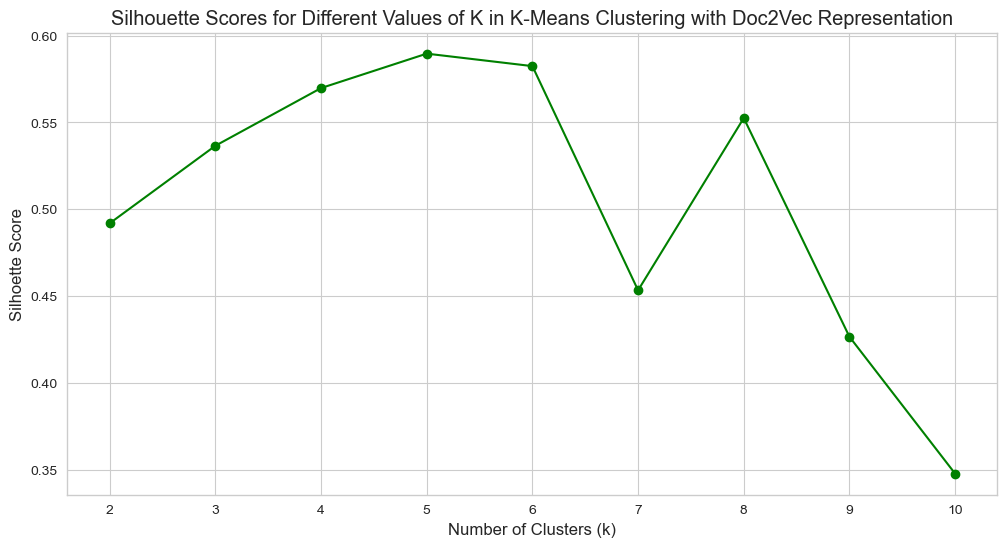

'\nInterpretation:\nThe silhouette scores indicate that the optimal number of clusters is 5, since this value of k has the highest silhouette score.\nTherefore, I will use k=2 for the K-Means clustering with the Doc2Vec representation.\n'

/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,title,doc2vec_cluster
0,rev1_pine_valley_1,0
1,rev2_pine_valley_2,2
2,rev3_cypress_point_1,1
3,rev4_cypress_point_2,2
4,rev5_shinnecock_1,3


doc2vec_cluster
0     2
1    20
2    23
3    13
4     2
Name: count, dtype: int64

In [27]:
"""
PHASE 3 (CONTINUED): COMPARING TF-IDF AND DOC2VEC FOR TEXT REPRESENTATION AND CLUSTERING
"""
### 5. K-Means clustering with Doc2Vec representation ###
## Use Silhouette score to determine the optimal number of clusters ##
# Convert the Doc2Vec DataFrame to a matrix
doc2vec_matrix = doc2vec_df.drop(columns='title').values

# Perform K-Means clustering for each of the k values
silhouette_scores_list_doc2vec = []
# Define the range of k values to test
k_values = range(2, 11)
# Perform K-Means clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(doc2vec_matrix)
    silhouette_avg = silhouette_score(doc2vec_matrix, cluster_labels)
    silhouette_scores_list_doc2vec.append(silhouette_avg)
# List the silhouette scores for each value of k
silhouette_scores_list_doc2vec

# Plot the silhouette scores for each value of k
plt.figure(figsize=(12, 6))
plt.plot(k_values, silhouette_scores_list_doc2vec, marker='o', color='green')
plt.title('Silhouette Scores for Different Values of K in K-Means Clustering with Doc2Vec Representation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhoette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

"""
Interpretation:
The silhouette scores indicate that the optimal number of clusters is 5, since this value of k has the highest silhouette score.
Therefore, I will use k=2 for the K-Means clustering with the Doc2Vec representation.
"""

# Perform K-Means clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(doc2vec_matrix)
# Add the cluster labels to the Doc2Vec DataFrame
doc2vec_df['doc2vec_cluster'] = cluster_labels
# Display the cluster labels
doc2vec_df[['title', 'doc2vec_cluster']].head()

# Calculate the number of reviews in each cluster
cluster_counts_doc2vec = doc2vec_df['doc2vec_cluster'].value_counts().sort_index()
# Display the number of reviews in each cluster
cluster_counts_doc2vec

'\nPHASE 3 (CONTINUED): COMPARING TF-IDF AND DOC2VEC FOR TEXT REPRESENTATION AND CLUSTERING\n'

/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


,MDS1,MDS2,title,doc2vec_cluster,file_name,review_author
0,-0.061951,-0.116114,rev1_pine_valley_1,0,rev1_pine_valley_1,David Jones
1,-0.060881,-0.000277,rev2_pine_valley_2,2,rev2_pine_valley_2,Bill Satterfield
2,0.038109,-0.019883,rev3_cypress_point_1,1,rev3_cypress_point_1,top100golfcourses
3,-0.051068,0.015787,rev4_cypress_point_2,2,rev4_cypress_point_2,Bill Satterfield
4,0.032304,0.013552,rev5_shinnecock_1,3,rev5_shinnecock_1,Andrew Harvey


<Figure size 1200x800 with 0 Axes>

/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_cate

<Axes: xlabel='MDS1', ylabel='MDS2'>

Text(0.5, 1.0, 'MDS Visualization of Doc2Vec K-Means Clusters')

Text(-0.06195107991786242, -0.11611424800548577, 'David Jones')

Text(-0.06088066819887898, -0.000277198599485052, 'Bill Satterfield')

Text(0.038109391103317604, -0.01988269916403993, 'top100golfcourses')

Text(-0.051067891612131065, 0.01578665387469751, 'Bill Satterfield')

Text(0.03230369362068735, 0.013551786921841174, 'Andrew Harvey')

Text(-0.05735477908533293, -0.012517429139034109, 'David Jones')

Text(-0.052421206831716895, -0.007526434442064407, 'David Jones')

Text(0.02732606718239569, 0.007586217733172764, 'Graylyl Loomis')

Text(0.03667189223008657, -0.024226252684578165, 'top100golfcourses')

Text(0.027314223644303075, 0.008620345755995396, 'Graylyl Loomis')

Text(-0.041749926782514074, 0.005553456985468062, 'Andy Johnson')

Text(0.03644261924143046, -0.02618049764077023, 'top100golfcourses')

Text(-0.03512323600202038, 0.014952962022335502, 'Bill Satterfield')

Text(-0.08774291357743029, -0.17535421825890732, 'John Sabino')

Text(-0.05448468954135812, -0.006935587894047813, 'David Jones')

Text(0.03523969685202157, 0.01933593202492672, 'Andrew Harvie')

Text(0.08653063927798119, 0.1896495201159273, 'Andy Johnson')

Text(-0.05260247819717425, 0.01262043923931213, 'top100golfcourses')

Text(0.03560344393115866, -0.027826278168421814, 'top100golfcourses')

Text(0.040755341833371955, -0.017219615127270955, 'Bill Satterfield')

Text(-0.058785000154308216, -0.007597312359444616, 'David Jones')

Text(0.04098845509362385, 0.02742295811455052, 'Andrew Harvie')

Text(-0.04723108944028957, -0.0037919139728307414, 'Sean Ogle')

Text(0.02907285228905733, 0.010929986843119067, 'Bill Satterfield')

Text(0.03405424259189199, 0.015320070943374084, 'Bill Satterfield')

Text(0.03618408936729536, -0.02846440649420326, 'top100golfcourses')

Text(0.035341140892529495, -0.03059949780488005, 'top100golfcourses')

Text(-0.048420873587981576, -0.007395399373472801, 'David Jones')

Text(-0.05199329098133673, 0.0004614889537092356, 'David Jones')

Text(-0.04984191461215768, 0.005928038441163741, 'top100golfcourses')

Text(-0.047398714812928816, 0.016073448194848117, 'Andy Johnson')

Text(-0.052010198391309055, 0.001542338638750811, 'David Jones')

Text(0.03200278400548927, 0.019435003423526193, 'Andrew Harvie')

Text(-0.1226068982627838, -0.015385815664807127, 'Sean Ogle')

Text(-0.03743600727905557, 0.018615206294357905, 'Andy Johnson')

Text(0.03491900198619661, -0.028863869867650903, 'top100golfcourses')

Text(0.03534437204543868, -0.030920340933374528, 'top100golfcourses')

Text(-0.040868591085158, 0.018131303267542705, 'Sean Ogle')

Text(0.03569698396698833, -0.02677643742972246, 'top100golfcourses')

Text(0.02706272548145655, 0.004617325509894245, 'Bill Satterfield')

Text(-0.04015210803194844, 0.01227227948818985, 'Cal Simmons')

Text(0.06881189710539179, 0.06381067842399221, 'Ari Techner')

Text(0.036610896587481484, -0.027543103603064462, 'top100golfcourses')

Text(0.06270282731835429, 0.044737875253369995, 'nan')

Text(-0.05236173847126728, 0.004833112047457841, 'Phillip Johnson')

Text(0.03669164555711806, -0.023732017523842894, 'top100golfcourses')

Text(0.038993985484376756, -0.018512729000835393, 'top100golfcourses')

Text(0.024187615273309808, 0.002148909215248068, 'Bill Satterfield')

Text(0.03565774986351894, 0.19418608630994552, 'Andy Johnson')

Text(0.042993501381819274, -0.01065074681484102, 'top100golfcourses')

Text(0.03704866899979042, -0.024073101814501827, 'top100golfcourses')

Text(0.046238145287846394, -0.0066011938972917635, 'Bill Satterfield')

Text(-0.058404409679811926, 0.010190921869735114, 'nan')

Text(0.03126138731873434, 0.014116573293656254, 'Bill Satterfield')

Text(-0.06326787431087894, -0.007036281412789157, 'David Jones')

Text(0.0360807560409947, -0.025877226622895478, 'top100golfcourses')

Text(-0.04000544232302044, 0.016093392044726925, 'Sean Ogle')

Text(0.03649045256644064, -0.024241432443225904, 'top100golfcourses')

Text(0.04861493612117625, -0.0018702540767151757, 'Graylyl Loomis')

Text(0.046814899627580606, -0.004530771010339758, 'Bill Satterfield')

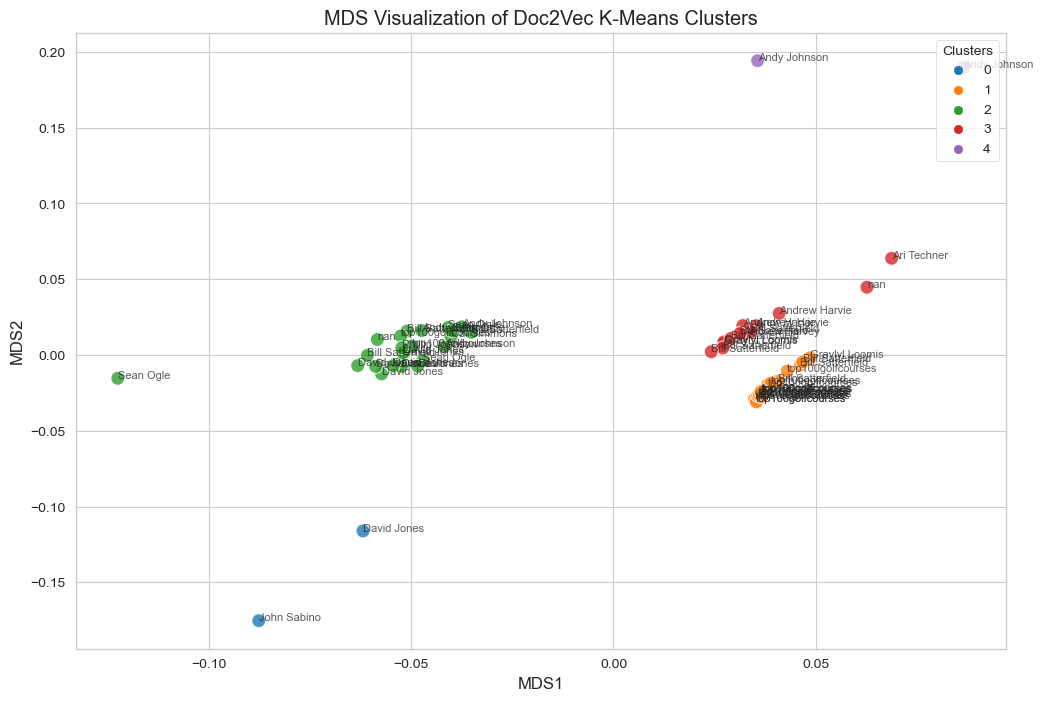

,PCA1,PCA2,title,doc2vec_cluster,file_name,review_author
0,2.685484,-3.238170,rev1_pine_valley_1,0,rev1_pine_valley_1,David Jones
1,2.203013,0.133772,rev2_pine_valley_2,2,rev2_pine_valley_2,Bill Satterfield
2,-1.865482,-1.334454,rev3_cypress_point_1,1,rev3_cypress_point_1,top100golfcourses
3,1.605268,0.726238,rev4_cypress_point_2,2,rev4_cypress_point_2,Bill Satterfield
4,-0.919947,1.115847,rev5_shinnecock_1,3,rev5_shinnecock_1,Andrew Harvey


<Figure size 1200x800 with 0 Axes>

/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_cate

<Axes: xlabel='PCA1', ylabel='PCA2'>

Text(0.5, 1.0, 'PCA Visualization of Doc2Vec K-Means Clusters')

Text(2.6854838330728246, -3.2381703712279584, 'David Jones')

Text(2.2030125841355654, 0.13377160179393355, 'Bill Satterfield')

Text(-1.8654816797731446, -1.334454276443088, 'top100golfcourses')

Text(1.6052681784090232, 0.7262375753389724, 'Bill Satterfield')

Text(-0.9199467311611309, 1.1158466662445397, 'Andrew Harvey')

Text(2.807690145907529, -0.3524091031580544, 'David Jones')

Text(2.6669193577312647, -0.0473079010515096, 'David Jones')

Text(-0.8765675204983516, 0.6743437178343766, 'Graylyl Loomis')

Text(-1.9221159678355062, -1.5957290538199276, 'top100golfcourses')

Text(-1.019150899333325, 0.653219044856484, 'Graylyl Loomis')

Text(2.2365116944881236, 0.7816197363472996, 'Andy Johnson')

Text(-1.7435918854441186, -1.5495772330726925, 'top100golfcourses')

Text(1.9759653639475296, 1.3733683072528517, 'Bill Satterfield')

Text(4.359938435742731, -5.0075460145198045, 'John Sabino')

Text(2.5848812026400974, -0.08787560190445187, 'David Jones')

Text(-1.0516850116661598, 1.2076450456112866, 'Andrew Harvie')

Text(-1.985085495811755, 6.607807774905461, 'Andy Johnson')

Text(1.7148547298344885, 0.5838677064627142, 'top100golfcourses')

Text(-2.165924410016212, -1.9097971210082878, 'top100golfcourses')

Text(-1.9309778561515558, -1.158749864582133, 'Bill Satterfield')

Text(2.508938802403192, -0.24024067524865395, 'David Jones')

Text(-1.086173833056917, 1.5172376504587317, 'Andrew Harvie')

Text(2.6556102680044504, 0.5164580087810835, 'Sean Ogle')

Text(-1.0397742122570082, 0.8121774792147487, 'Bill Satterfield')

Text(-1.158109476650626, 1.094857705632823, 'Bill Satterfield')

Text(-1.9322691788271567, -1.759371945382925, 'top100golfcourses')

Text(-1.828770387854772, -1.7968753766357637, 'top100golfcourses')

Text(2.7583325486147308, 0.10491921241747597, 'David Jones')

Text(2.257023925011705, 0.20304774589137636, 'David Jones')

Text(2.0402722431813958, 0.45284237591577453, 'top100golfcourses')

Text(1.6559705531510343, 0.8872880092968697, 'Andy Johnson')

Text(2.2071525882833365, 0.25575674513986807, 'David Jones')

Text(-1.0493288765169326, 0.8817518394106715, 'Andrew Harvie')

Text(2.9625374506963373, -0.6864492110091713, 'Sean Ogle')

Text(2.035194222771149, 1.3060996000281362, 'Andy Johnson')

Text(-1.927411386152027, -1.8155365245188992, 'top100golfcourses')

Text(-1.4452980269847209, -1.590171574212239, 'top100golfcourses')

Text(1.8297482856750473, 1.193888036140544, 'Sean Ogle')

Text(-1.4793140605110966, -1.438053253283864, 'top100golfcourses')

Text(-0.8303506964513996, 0.6597382543720949, 'Bill Satterfield')

Text(1.9490568972170572, 1.0995168778295406, 'Cal Simmons')

Text(-1.979797577608309, 2.795940528374344, 'Ari Techner')

Text(-1.5061257160027737, -1.4403376602951503, 'top100golfcourses')

Text(-1.5678781658604937, 2.4332189285731234, 'nan')

Text(2.0220230422561842, 0.3253550112432916, 'Phillip Johnson')

Text(-1.856744851796556, -1.5284865771707306, 'top100golfcourses')

Text(-1.7756002605910537, -1.152218492393052, 'top100golfcourses')

Text(-0.9912933327395282, 0.26508556901749547, 'Bill Satterfield')

Text(-1.8498510118444613, 5.586977162184199, 'Andy Johnson')

Text(-2.7215527932527945, -1.555135632493647, 'top100golfcourses')

Text(-2.1375543707672167, -1.7153491885139092, 'top100golfcourses')

Text(-2.0316782501152435, -0.5563825124319103, 'Bill Satterfield')

Text(1.6974694461885003, 0.29629952608720395, 'nan')

Text(-1.2489537852792711, 0.8314022026136854, 'Bill Satterfield')

Text(2.3550136687949617, -0.35121826026224856, 'David Jones')

Text(-2.2455976593198477, -1.8846100801180596, 'top100golfcourses')

Text(1.8988095486322787, 1.224048791881807, 'Sean Ogle')

Text(-2.2193330252655015, -1.7978120309595536, 'top100golfcourses')

Text(-2.040526706045936, -0.31306137455276534, 'Graylyl Loomis')

Text(-2.2438639173476447, -0.6987075268823579, 'Bill Satterfield')

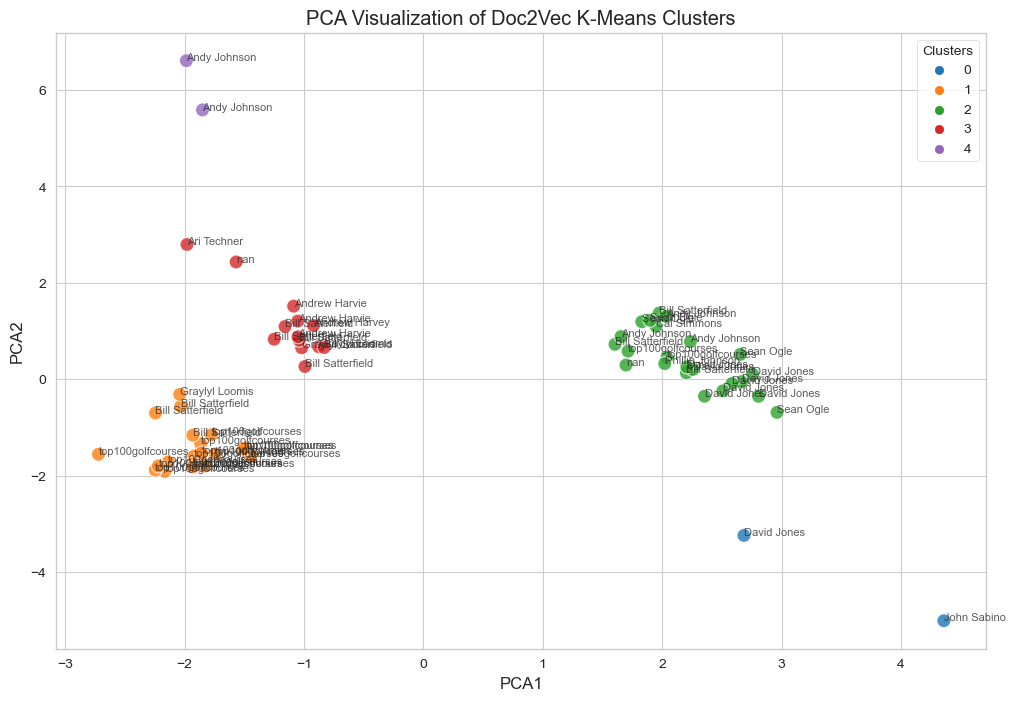

In [32]:
"""
PHASE 3 (CONTINUED): COMPARING TF-IDF AND DOC2VEC FOR TEXT REPRESENTATION AND CLUSTERING
"""
### 6. Visualization of Doc2Vec clusters using Multidimensional Scaling (MDS) and Principal Component Analysis (PCA) ###
# 6.a Multidimensional Sclaing (MDS) visualization
# Create a similarity matrix using cosine similarity
similarity_matrix_doc2vec = cosine_similarity(doc2vec_matrix)

# Perform MDS to reduce the dimensionality of the similarity matrix
mds_doc2vec = MDS(n_components=2, dissimilarity='precomputed', random_state=42)

# Fit and transform the MDS coordinates
mds_coordinates_doc2vec = mds_doc2vec.fit_transform(1 - similarity_matrix_doc2vec)

# Convert the MDS coordinates to a DataFrame
mds_df_doc2vec = pd.DataFrame(mds_coordinates_doc2vec, columns=['MDS1', 'MDS2'], index=doc2vec_df['title'])

# Add the cluster labels to the MDS DataFrame
mds_df_doc2vec = mds_df_doc2vec.merge(doc2vec_df[['title', 'doc2vec_cluster']], left_index=True, right_on='title')

# Add the course review author to the MDS DataFrame (this information is in the original golf_course_review DataFrame under the 'review_author' column)
# Merge the MDS DataFrame with the golf_course_review DataFrame to get the review author
mds_df_doc2vec = mds_df_doc2vec.merge(golf_course_review[['file_name', 'review_author']], left_on='title', right_on='file_name')

# Check the MDS DataFrame
mds_df_doc2vec.head()

# Plot the MDS visualization of the Doc2Vec clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=mds_df_doc2vec, x='MDS1', y='MDS2', hue='doc2vec_cluster', palette='tab10', s=100, alpha=0.8)
plt.title('MDS Visualization of Doc2Vec K-Means Clusters')
plt.legend(title='Clusters', loc='upper right')
# Add an annotation to the plot of the review author
for i in range(len(mds_df_doc2vec)):
    plt.text(mds_df_doc2vec['MDS1'][i], mds_df_doc2vec['MDS2'][i], mds_df_doc2vec['review_author'][i], fontsize=8, alpha=0.75)
plt.show()

# 6.b Principal Component Analysis (PCA) visualization
# Perform PCA to reduce the dimensionality of the Doc2Vec matrix
pca_doc2vec = PCA(n_components=2, random_state=42)

# Fit and transform the PCA coordinates
pca_coordinates_doc2vec = pca_doc2vec.fit_transform(doc2vec_matrix)

# Convert the PCA coordinates to a DataFrame
pca_df_doc2vec = pd.DataFrame(pca_coordinates_doc2vec, columns=['PCA1', 'PCA2'], index=doc2vec_df['title'])

# Add the cluster labels to the PCA DataFrame
pca_df_doc2vec = pca_df_doc2vec.merge(doc2vec_df[['title', 'doc2vec_cluster']], left_index=True, right_on='title')

# Add the course review author to the PCA DataFrame
pca_df_doc2vec = pca_df_doc2vec.merge(golf_course_review[['file_name', 'review_author']], left_on='title', right_on='file_name')

# Check the PCA DataFrame
pca_df_doc2vec.head()

# Plot the PCA visualization of the Doc2Vec clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df_doc2vec, x='PCA1', y='PCA2', hue='doc2vec_cluster', palette='tab10', s=100, alpha=0.8)
plt.title('PCA Visualization of Doc2Vec K-Means Clusters')
plt.legend(title = 'Clusters', loc='upper right')
# Add an annotation to the plot of the review author
for i in range(len(pca_df_doc2vec)):
    plt.text(pca_df_doc2vec['PCA1'][i], pca_df_doc2vec['PCA2'][i], pca_df_doc2vec['review_author'][i], fontsize=8, alpha=0.75)
plt.show()




<Figure size 1200x800 with 0 Axes>

/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_cate

<Axes: xlabel='PCA1', ylabel='PCA2'>

Text(0.5, 1.0, 'PCA Visualization of Doc2Vec K-Means Clusters with Course Name Annotations')

Text(2.6854838330728246, -3.2381703712279584, 'Pine Valley')

Text(2.2030125841355654, 0.13377160179393355, 'Pine Valley')

Text(-1.8654816797731446, -1.334454276443088, 'Cypress Point')

Text(1.6052681784090232, 0.7262375753389724, 'Cypress Point')

Text(-0.9199467311611309, 1.1158466662445397, 'Shinnecock Hills')

Text(2.807690145907529, -0.3524091031580544, 'Shinnecock Hills')

Text(2.6669193577312647, -0.0473079010515096, 'National Golf Links of America')

Text(-0.8765675204983516, 0.6743437178343766, 'National Golf Links of America')

Text(-1.9221159678355062, -1.5957290538199276, 'Oakmont')

Text(-1.019150899333325, 0.653219044856484, 'Oakmont')

Text(2.2365116944881236, 0.7816197363472996, 'Sand Hills')

Text(-1.7435918854441186, -1.5495772330726925, 'Sand Hills')

Text(1.9759653639475296, 1.3733683072528517, 'Augusta National')

Text(4.359938435742731, -5.0075460145198045, 'Augusta National')

Text(2.5848812026400974, -0.08787560190445187, 'Merion (East)')

Text(-1.0516850116661598, 1.2076450456112866, 'Merion (East)')

Text(-1.985085495811755, 6.607807774905461, 'Fishers Island')

Text(1.7148547298344885, 0.5838677064627142, 'Fishers Island')

Text(-2.165924410016212, -1.9097971210082878, 'Los Angeles (North)')

Text(-1.9309778561515558, -1.158749864582133, 'Los Angeles (North)')

Text(2.508938802403192, -0.24024067524865395, 'Pebble Beach')

Text(-1.086173833056917, 1.5172376504587317, 'Pebble Beach')

Text(2.6556102680044504, 0.5164580087810835, 'Pinehurst (No. 2)')

Text(-1.0397742122570082, 0.8121774792147487, 'Pinehurst (No. 2)')

Text(-1.158109476650626, 1.094857705632823, 'Chicago GC')

Text(-1.9322691788271567, -1.759371945382925, 'Chicago GC')

Text(-1.828770387854772, -1.7968753766357637, 'Riviera')

Text(2.7583325486147308, 0.10491921241747597, 'Riviera')

Text(2.257023925011705, 0.20304774589137636, "Friar's Head")

Text(2.0402722431813958, 0.45284237591577453, "Friar's Head")

Text(1.6559705531510343, 0.8872880092968697, 'Winged Foot (West)')

Text(2.2071525882833365, 0.25575674513986807, 'Winged Foot (West)')

Text(-1.0493288765169326, 0.8817518394106715, 'Pacific Dunes')

Text(2.9625374506963373, -0.6864492110091713, 'Pacific Dunes')

Text(2.035194222771149, 1.3060996000281362, 'Prairie Dunes')

Text(-1.927411386152027, -1.8155365245188992, 'Prairie Dunes')

Text(-1.4452980269847209, -1.590171574212239, 'Oakland Hills (South)')

Text(1.8297482856750473, 1.193888036140544, 'Oakland Hills (South)')

Text(-1.4793140605110966, -1.438053253283864, 'Crystal Downs')

Text(-0.8303506964513996, 0.6597382543720949, 'Crystal Downs')

Text(1.9490568972170572, 1.0995168778295406, 'Seminole')

Text(-1.979797577608309, 2.795940528374344, 'Seminole')

Text(-1.5061257160027737, -1.4403376602951503, 'The Country Club (Clyde/Squirrel)')

Text(-1.5678781658604937, 2.4332189285731234, 'The Country Club (Clyde/Squirrel)')

Text(2.0220230422561842, 0.3253550112432916, 'San Francisco')

Text(-1.856744851796556, -1.5284865771707306, 'San Francisco')

Text(-1.7756002605910537, -1.152218492393052, 'Southern Hills')

Text(-0.9912933327395282, 0.26508556901749547, 'Southern Hills')

Text(-1.8498510118444613, 5.586977162184199, 'Shoreacres')

Text(-2.7215527932527945, -1.555135632493647, 'Shoreacres')

Text(-2.1375543707672167, -1.7153491885139092, 'Somerset Hills')

Text(-2.0316782501152435, -0.5563825124319103, 'Somerset Hills')

Text(1.6974694461885003, 0.29629952608720395, 'California Golf Club of San Francisco')

Text(-1.2489537852792711, 0.8314022026136854, 'California Golf Club of San Francisco')

Text(2.3550136687949617, -0.35121826026224856, 'Garden City')

Text(-2.2455976593198477, -1.8846100801180596, 'Garden City')

Text(1.8988095486322787, 1.224048791881807, 'Maidstone')

Text(-2.2193330252655015, -1.7978120309595536, 'Maidstone')

Text(-2.040526706045936, -0.31306137455276534, 'Bethpage (Black)')

Text(-2.2438639173476447, -0.6987075268823579, 'Bethpage (Black)')

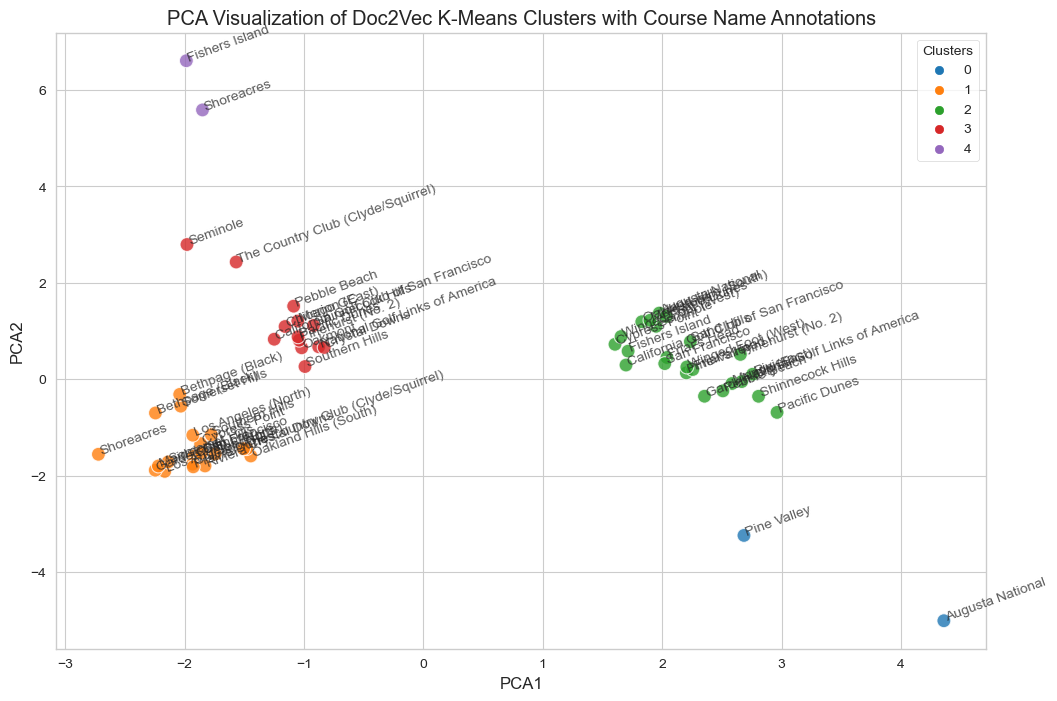

In [33]:
# Merge the PCA DataFrame with the golf_course_review DataFrame to get the course name
pca_df_doc2vec = pca_df_doc2vec.merge(golf_course_review[['file_name', 'course_name']], left_on='title', right_on='file_name', suffixes=('_pca', '_golf'))

# Plot the PCA visualization of the Doc2Vec clusters with course name annotations


plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df_doc2vec, x='PCA1', y='PCA2', hue='doc2vec_cluster', palette='tab10', s=100, alpha=0.8)
plt.title('PCA Visualization of Doc2Vec K-Means Clusters with Course Name Annotations')
plt.legend(title='Clusters', loc='upper right')
# Add an annotation to the plot of the course name
for i in range(len(pca_df_doc2vec)):
    plt.text(pca_df_doc2vec['PCA1'][i], pca_df_doc2vec['PCA2'][i], pca_df_doc2vec['course_name'][i], fontsize=10, alpha=0.75, rotation=20)
plt.show()

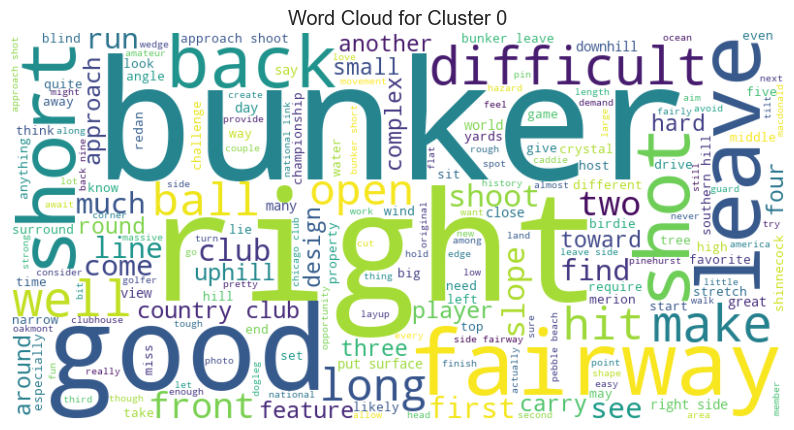

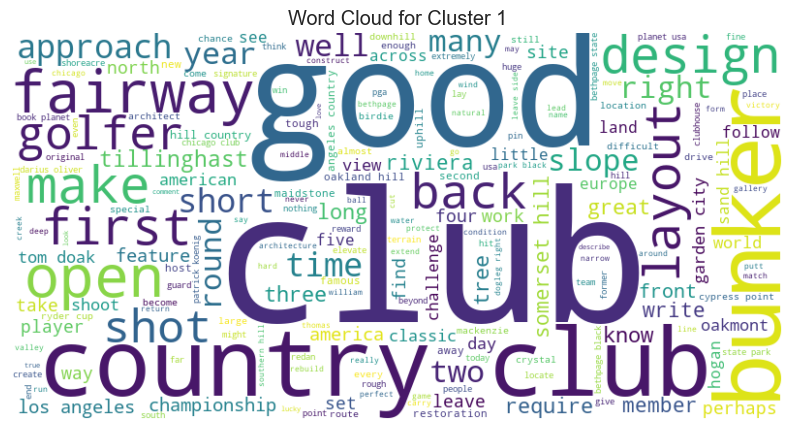

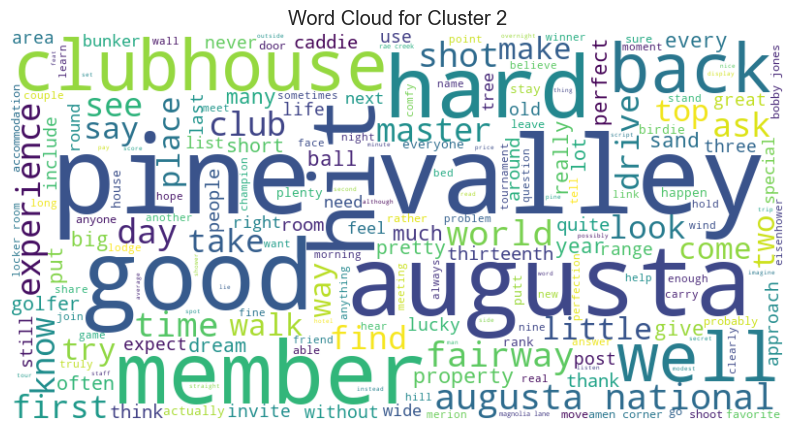

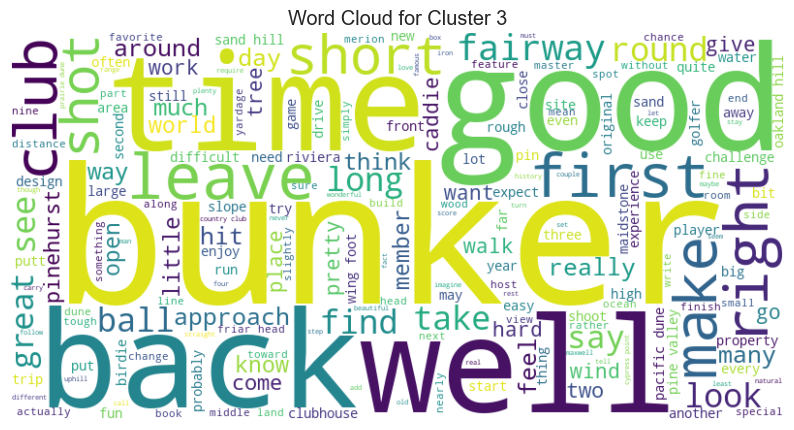

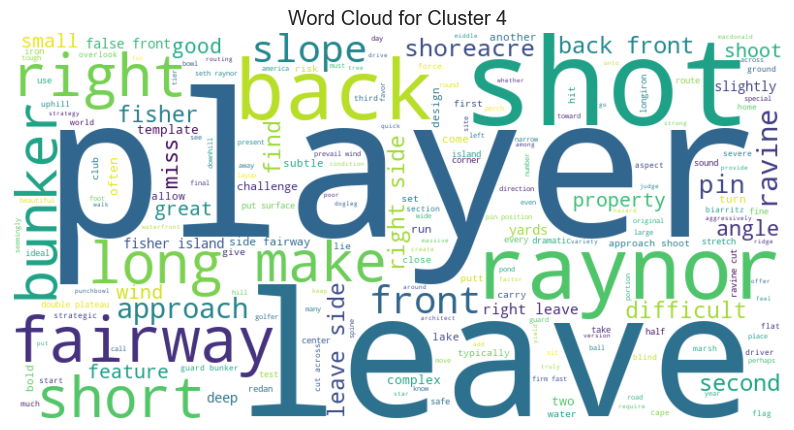

0.3940678

In [17]:
### 7. Evaluation of the clustering results ###
# Create word clouds for each of the 5 clusters and analyze the common words in each cluster
from wordcloud import WordCloud
# Define a function to generate a word cloud for a given cluster
def generate_word_cloud(cluster_number, cluster_df):
    # Get the indices of the reviews in the cluster
    cluster_indices = cluster_df[cluster_df['doc2vec_cluster'] == cluster_number].index
    # Concatenate the review text for the cluster
    cluster_text = ' '.join([golf_course_review['cleaned_review_text'][i] for i in cluster_indices])
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    # Display the word cloud
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_number}')
    plt.show()

# Generate word clouds for each of the 5 clusters
for i in range(5):
    generate_word_cloud(i, doc2vec_df)
    
# Calculate the Davies-Bouldin score for the Doc2Vec clusters
davies_bouldin_score = silhouette_score(doc2vec_matrix, doc2vec_df['doc2vec_cluster'])
davies_bouldin_score

In [13]:
from gensim.models.coherencemodel import CoherenceModel
"""
PHASE 4: TOPIC MODELING USING LATENT DIRICHLET ALLOCATION (LDA)

In this phase, I will perform topic modeling on the golf course reviews using Latent Dirichlet Allocation (LDA). 
I will perform the following steps to extract topics from the reviews:
    1. Tokenization: Tokenize the preprocessed text data
    2. Dictionary and Corpus creation: Create a dictionary and a corpus from the tokenized text data
    3. LDA model training: Train an LDA model on the corpus
    4. Topic extraction: Extract topics from the LDA model
    5. Visualization: Visualize the topics using the pyLADavis library
    
    Note: The number of topics in the LDA model is a hyperparameter that needs to be tuned.
"""
### 1. Tokenization: Tokenize the preprocessed text data ###
# Tokenize the procossed text
golf_course_review['tokenized_text'] = golf_course_review['cleaned_review_text'].apply(lambda x: x.split())

# Display the tokenized text
golf_course_review[['review_id', 'file_name', 'tokenized_text']].head()

### 2. Dictionary and Corpus creation: Create a dictionary and a corpus from the tokenized text data ###
# Create a dictionary from the tokenized text
dictionary = corpora.Dictionary(golf_course_review['tokenized_text'])

# Create a corpus from the dictionary
corpus = [dictionary.doc2bow(text) for text in golf_course_review['tokenized_text']]

### 3. LDA model training: Train an LDA model on the corpus ###
## Hyperparameter tuning for the number of topics ##
# Define the range of k values to test
k_values = range(2, 11)

# Initialize the list to store coherence scores
coherence_scores = []

# Perform LDA for each value of k
for k in k_values:
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, random_state=42)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=golf_course_review['tokenized_text'], dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model_lda.get_coherence())
    
# List the coherence scores for each value of k
coherence_scores

'\nPHASE 4: TOPIC MODELING USING LATENT DIRICHLET ALLOCATION (LDA)\n\nIn this phase, I will perform topic modeling on the golf course reviews using Latent Dirichlet Allocation (LDA). \nI will perform the following steps to extract topics from the reviews:\n    1. Tokenization: Tokenize the preprocessed text data\n    2. Dictionary and Corpus creation: Create a dictionary and a corpus from the tokenized text data\n    3. LDA model training: Train an LDA model on the corpus\n    4. Topic extraction: Extract topics from the LDA model\n    5. Visualization: Visualize the topics using the pyLADavis library\n    \n    Note: The number of topics in the LDA model is a hyperparameter that needs to be tuned.\n'

,review_id,file_name,tokenized_text
0,1,rev1_pine_valley_1,"[much, point, try, holebyhole, guide, pine, va..."
1,2,rev2_pine_valley_2,"[expect, pine, valley, fine, planet, hold, roy..."
2,3,rev3_cypress_point_1,"[every, true, golfer, would, love, cypress, po..."
3,4,rev4_cypress_point_2,"[expect, even, feel, worthy, write, review, cy..."
4,5,rev5_shinnecock_1,"[many, acclaim, seek, document, shinnecock, hi..."


[0.3413751436577084,
 0.33387731091941264,
 0.3264488167389521,
 0.32524505985661456,
 0.32614525013034523,
 0.33620209674350676,
 0.3308252281933962,
 0.3296454398677169,
 0.33169011496804585]

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Coherence Scores for Different Values of K in LDA Topic Modeling')

Text(0.5, 0, 'Number of Topics (K)')

Text(0, 0.5, 'Coherence Score')

([<matplotlib.axis.XTick at 0x162282340>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

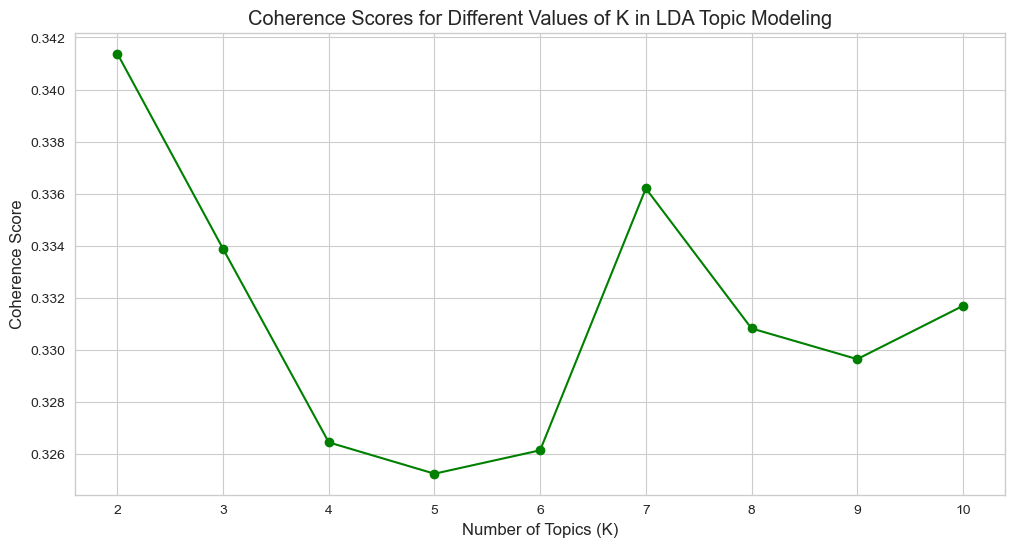

'\nInterpretation:\nThe coherence scores indicate that the optimal number of topics is 4, since this value of k has the hightest coherence score.\nTheresfore, I will use k=4 for the LDA topic modeling.\n'

In [14]:

# Plot the coherence scores for each value of k
plt.figure(figsize=(12, 6))
plt.plot(k_values, coherence_scores, marker='o', color='green')
plt.title('Coherence Scores for Different Values of K in LDA Topic Modeling')
plt.xlabel('Number of Topics (K)')
plt.ylabel('Coherence Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

"""
Interpretation:
The coherence scores indicate that the optimal number of topics is 4, since this value of k has the hightest coherence score.
Theresfore, I will use k=4 for the LDA topic modeling.
"""

# Train an LDA model with k=7
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42)

In [15]:
### 4. Topic extraction: Extract topics from the LDA model ###
# Extract the topics from the LDA model
topics = lda_model.print_topics(num_words=10)

# Display the topics extracted from the LDA model with the top 10 words for each topic
for topic in topics:
    print(f"Topic {topic[0]}: {topic[1]}")
    
### 5. Visualization: Visualize the topics using the pyLDAvis library ###
import pyLDAvis.gensim_models
# Visualize the topics using pyLDAvis
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)


Topic 0: 0.011*"bunker" + 0.009*"club" + 0.008*"fairway" + 0.007*"leave" + 0.007*"shot" + 0.007*"right" + 0.006*"short" + 0.006*"good" + 0.006*"back" + 0.006*"get"
Topic 1: 0.012*"bunker" + 0.010*"good" + 0.009*"fairway" + 0.009*"club" + 0.009*"leave" + 0.007*"shot" + 0.007*"back" + 0.007*"right" + 0.006*"get" + 0.005*"well"
Topic 2: 0.010*"bunker" + 0.008*"right" + 0.007*"leave" + 0.007*"back" + 0.006*"fairway" + 0.006*"good" + 0.006*"get" + 0.006*"make" + 0.005*"shot" + 0.005*"short"
Topic 3: 0.010*"right" + 0.010*"bunker" + 0.010*"club" + 0.010*"leave" + 0.009*"back" + 0.008*"fairway" + 0.007*"good" + 0.007*"shot" + 0.006*"make" + 0.006*"front"
Topic 4: 0.010*"right" + 0.010*"bunker" + 0.009*"leave" + 0.009*"good" + 0.008*"short" + 0.007*"club" + 0.007*"back" + 0.007*"fairway" + 0.006*"long" + 0.006*"well"


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.001062  0.000219       1        1  28.170862
4     -0.001192 -0.005516       2        1  25.605081
3      0.007419 -0.003037       3        1  25.214432
2     -0.009673  0.000344       4        1  12.159668
0      0.002384  0.007990       5        1   8.849957, topic_info=         Term        Freq       Total Category  logprob  loglift
64     bunker  374.000000  374.000000  Default  30.0000  30.0000
165   fairway  273.000000  273.000000  Default  29.0000  29.0000
90       club  293.000000  293.000000  Default  28.0000  28.0000
442      shot  216.000000  216.000000  Default  27.0000  27.0000
294      make  181.000000  181.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
429       see    9.967517  110.326454   Topic5  -5.7375   0.0206
28   approach   12.584384  168.143380   Topic5  -5.5044  -0.1676
770      hill   10.296204  125.974211   Topic5  -5.7051  -0.0795
541      well    9.528653  182.184919   Topic5  -5.7826  -0.5260
230       hit    9.130883  134.439685   Topic5  -5.8252  -0.2647

[430 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
560       1  0.426313   acre
560       2  0.255788   acre
560       3  0.170525   acre
560       4  0.085263   acre
560       5  0.085263   acre
...     ...       ...    ...
556       3  0.216990  would
556       4  0.127201  would
556       5  0.097271  would
4108      3  0.593582  wound
4550      1  0.562126   zach

[908 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 4, 3, 1])